<span style="color:blue"><font size="6">**Приоритизация гипотез и анализ результатов AB-теста интернет-магазина**</span>


## Описание проекта


Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки интернет-магазина.


<span style="color:red">**Цели исследования:**</span> 
    
* приоритизировать гипотезы, 
    
* запустить A/B-тест и проанализировать результаты,
  
* принять решение об остановке или продолжении теста.

    
<span style="color:red">**В ходе анализа А/В теста будут изучены следующие метрики:**</span> 
* кумулятивная выручка по группам,

* кумулятивный средний чек по группам,
    
* кумулятивный показатель конверсии по группам,

* количество и стоимость заказов и по пользователям,
    
* аномалии и выбросы,
 
* статистическая значимость различий в среднем чеке по "сырым" и " очищенным" данным отдельно,  
 
* статистическая значимость различий в конверсии по "сырым" и " очищенным" данным отдельно.

**Описание данных:**
    
**1) Файл /datasets/hypothesis.csv (9 гипотез по увеличению выручки интернет-магазина):**

*Hypothesis* — краткое описание гипотезы;
    
*Reach* — охват пользователей по 10-балльной шкале;
    
*Impact* — влияние на пользователей по 10-балльной шкале;
    
*Confidence* — уверенность в гипотезе по 10-балльной шкале;
    
*Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**2) Файл /datasets/orders.csv (результаты A/B теста по заказам):**

*transactionId* — идентификатор заказа;
    
*visitorId* — идентификатор пользователя, совершившего заказ;
    
*date* — дата, когда был совершён заказ;
    
*revenue* — выручка заказа;
    
*group* — группа A/B-теста, в которую попал заказ.
    
**3) Файл /datasets/visitors.csv (результаты A/B теста по пользователям):**

*date* — дата;
    
*group* — группа A/B-теста;
    
*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста.

##  Загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from scipy import stats as st
import scipy.stats as stats

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'))

In [3]:
# создадим функцию для отображения общей информации о таблицах, пропусках и явных дубликатах
def df_info(df):
    pd.set_option("max_colwidth", 150)
    display(df.head())
    print(' ')
    df.info()
    print(' ')
    print('\033[1m' + 'Описание данных:' + '\033[0m')
    display(df.describe())
    print(' ')
    print('\033[1m' + 'Пропуски в таблице:' + '\033[0m')
    display(df.isna().sum())
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', df.duplicated().sum())

###  Гипотезы (hypothesis)

In [4]:
df_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
 
Описание данных:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


 
Пропуски в таблице:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество дубликатов в таблице: 0


**В таблице представлены 9 строк. Типы данных корректны. Наименования столбцов лучше привести к нижнему регистру. Пропущенные значения и дубликаты не найдены.**

###  Заказы (orders)

In [5]:
df_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
 
Описание данных:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


 
Пропуски в таблице:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество дубликатов в таблице: 0


**В таблице с заказами представлены 1198 записей. В столбце с датой указан неверный тип данных. Наименования столбцов корректны. Пропущенные значения и дубликаты не найдены.**

###  Пользователи (visitors)

In [6]:
df_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
 
Описание данных:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


 
Пропуски в таблице:


date        0
group       0
visitors    0
dtype: int64

Количество дубликатов в таблице: 0


**В таблице с пользователями представлены 63 записи. В столбце с датой указан неверный тип данных. Наименования столбцов корректны. Пропущенные значения и дубликаты не найдены.**

##  Предобработка данных

В ходе ознакомления с данными были выявлены некорректные наименования столбцов в таблице с гипотезами и некорректный тип данных столбцов с датой в таблицах заказов и пользователей.

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


 Посмотрим для какого периода предоставлены данные по заказам и пользователям, нет ли искажения периода:

In [9]:
display(orders['date'].min(), orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [10]:
display(visitors['date'].min(), visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

**В ходе предобработки наименования столбцов приведены к нижнему регистру, столбцы с датой приведены к типу datetime. Период  данных по заказам и пользователям с 01.08.2019 по 31.08.2019**

##  Приоритизация гипотез (1 часть)

###  Приоритизация гипотез с применением ICE

In [11]:
hypothesis['icy_score'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
hypothesis.sort_values(by='icy_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,icy_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


*Наивысший приоритет показала гипотеза "Запустить акцию, дающую скидку на товар в день рождения", затем гипотезы: "Добавить 2 новых канала привлечения трафика" и "Добавить форму подписки на все основные страницы".*

###  Приоритизация гипотез с применением RICE

In [12]:
hypothesis['ricy_score'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(1)
hypothesis.sort_values(by='ricy_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,icy_score,ricy_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


*Наивысший приоритет показала гипотеза "Добавить форму подписки на все основные страницы", затем гипотезa "Добавить блоки рекомендаций товаров на сайт".*

**Так как при расчете приоритизации гипотез методом RICE учитывается также показатель REACH (количество пользователей,которых затронет изменение), приоритет гипотез отличается от расчета методом ICE.**

**Таким образом метод ICE присвоил наивысший приоритет гипотезе "Запустить акцию, дающую скидку на товар в день рождения", в то время как метод RICE - гипотезе "Добавить форму подписки на все основные страницы"(так как данное нововведение затронет наибольшее кол-во пользователей). Однако, при расчете методом ICE гипотеза "Добавить форму подписки на все основные страницы" получила также довольно-таки высокий приоритет.**

##  Анализ A/B теста ( 2 часть)

In [13]:
# создадим массив уник.пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

#соберем агругирующие кумулятивные данные по дням о заказах
orders_agg = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#аналогично сделаем расчет для посетителей
visitors_agg = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединим таблицы и зададим название столбцам
cumulative_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',#дата
    'group',#группа
    'orders',#число заказов
    'buyers',#число покупателей
    'revenue',#выручка
    'visitors',#число посетителей
]
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


###  График кумулятивной выручки по группам

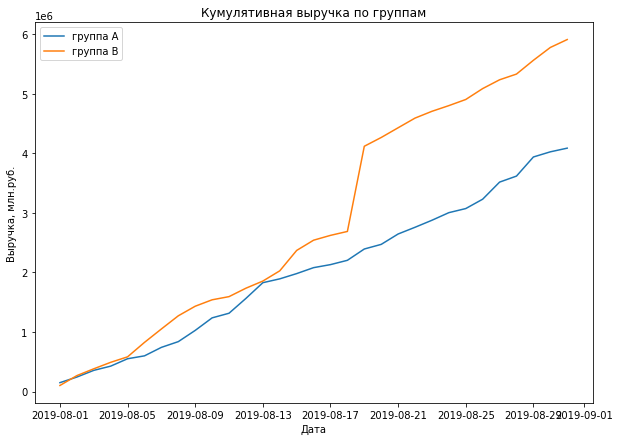

In [14]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,7))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'], label='группа A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'], label='группа B')
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка, млн.руб.")
plt.legend()
plt.show()

**На основании графика у обеих групп наблюдается рост выручки, однако, у группы B показатель кумулятивной выручки выше.**

**В группе В наблюдается резкий скачок выручки 18-19 августа, возможно в данные дни были совершены крупные заказы.**

###  График кумулятивного среднего чека по группам

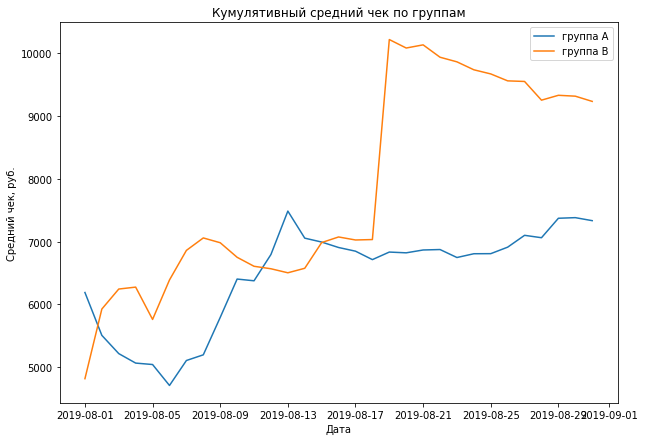

In [15]:
plt.figure(figsize=(10,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='группа B')
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.")
plt.legend()
plt.show()

**Средний чек группы В, начиная со 2 августа, практически все время был выше группы А, лишь в период с 11 по 15 августа по группе А было превышение. Однако, заметно резкое увеличение с 18-19 августа среднего чека группы В, стоит детальнее разобрать крупные заказы в этот период.**

###  График изменения кумулятивного среднего чека группы В к группе А

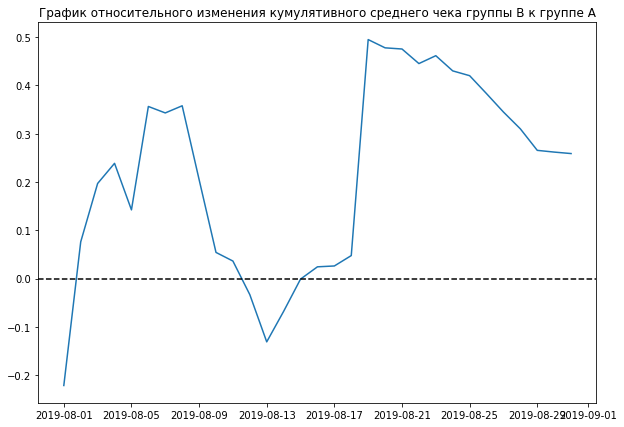

In [16]:
# собираем данные в одном датафрейме
merged_сummulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left',\
                                                        suffixes=['A', 'B'])

plt.figure(figsize=(10,7))
plt.plot(merged_сummulative_revenue['date'], (merged_сummulative_revenue['revenueB']/merged_сummulative_revenue['ordersB'])/\
         (merged_сummulative_revenue['revenueA']/merged_сummulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.show()

**В нескольких точках график различия между сегментами резко «скачет». Что еще раз подтверждает, что необходимо проверить данные на наличие анномальных заказов.**

###  График кумулятивного среднего числа заказов на посетителя по группам

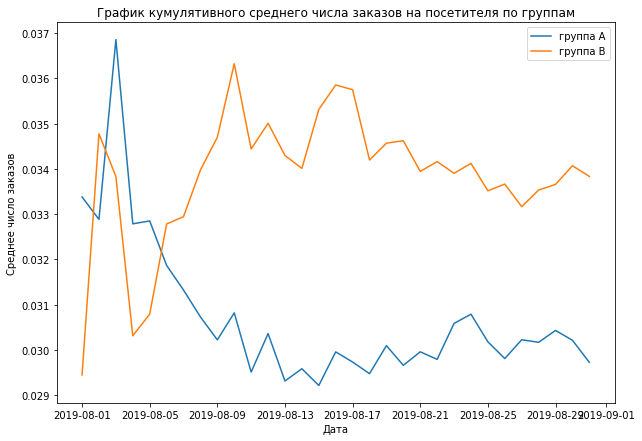

In [17]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A и по группе B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(10,7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='группа B')
plt.title("График кумулятивного среднего числа заказов на посетителя по группам")
plt.xlabel("Дата")
plt.ylabel("Среднее число заказов")
plt.legend()
plt.show()

**В начале теста группа А имела большее значение кумулятивного среднего числа заказов на посетителя, однако с 6 августа группа В стала заметно преобладать по данному показателю. Однако, на графике видно, что по группе В к концу периода кривая постепенно снижается.**

###  График изменения кумулятивного среднего числа заказов на посетителя группы В к группе А

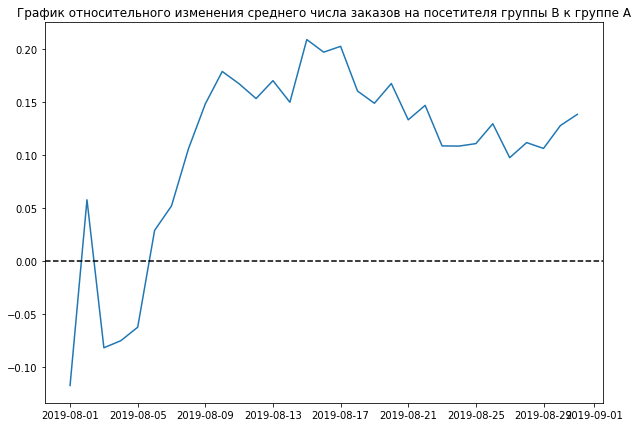

In [18]:
# собираем данные конверсии в одном датафрейме
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],\
                                                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,7))
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения среднего числа заказов на посетителя группы B к группе A")
plt.show()

**До 6 августа показатель изменения среднего числа заказов на посетителя группы B к группе A в основном имел отрицательное значение, с 6 августа произошел резкий скачок, однако, не смотря на дальнейший рост, все же к концу периода показатель плавно снижается.**

###  График количества заказов по пользователям. Определение границы аномальных пользователей

In [19]:
# посчитаем сколько заказов совершил каждый пользователь
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['userId', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


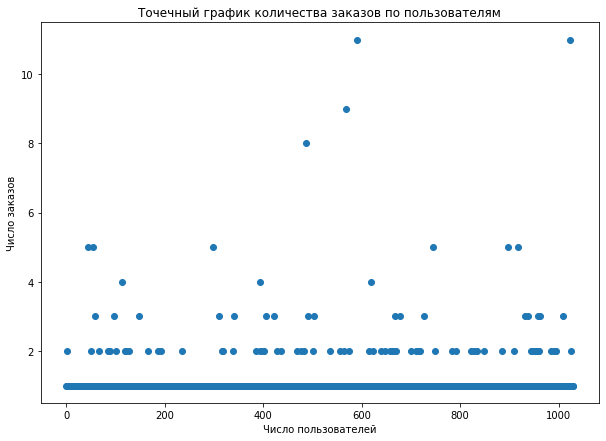

In [20]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(10,7))
plt.scatter(x_values, orders_by_users['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Число пользователей")
plt.ylabel("Число заказов")
plt.show()

Судя по графику большинство пользователей совершают не более 2-х заказов, также есть единичные покупатели, которые совершили от 4 до 11 заказов. Понять считать ли их аномалиями стоит после расчета 95 и 99 перцентилей.

In [21]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


**Расчет перцентилей показал, что не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. Разумно выбрать 2 заказа на одного пользователя как за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.**

###  График стоимостей заказов. Определение границы аномальных заказов

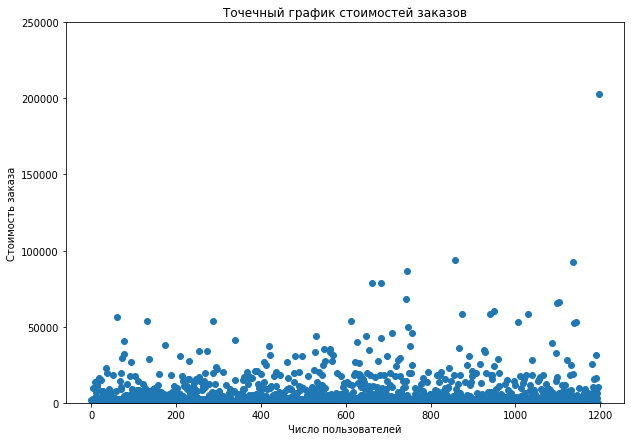

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,250000)
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Число пользователей")
plt.ylabel("Стоимость заказа")
plt.show()

Судя по графику в основном пользователи делают заказы на сумму не более 25-30 тыс. Проверим расчет 95 и 99 процентилей.

In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


**Расчет перцентилей показал, что не более 5% пользователей делают покупки дороже 28 000. И 1% пользователей заказывали на сумму более чем 58 233. Необходимо выбрать 28 000 как верхнюю границу стоимости заказа.**

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным

Сформулируем гипотезы:

**Нулевая гипотеза** - различий в среднем количестве заказов между группами нет.

**Альтернативная гипотеза** - различия в среднем между группами есть.

In [24]:
# сделаем отдельно таблицы с расчетами кол-ва посетителей на каждую дату по каждой группе, а также накопительно
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_date_a']


visitors_cum_a = visitors_daily_a.apply(lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitors_date_a': 'sum'}),axis=1)
visitors_cum_a.columns = ['date', 'visitors_cum_a']



visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_date_b']


visitors_cum_b = visitors_daily_b.apply(lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']]\
                                        .agg({'date': 'max', 'visitors_date_b': 'sum'}),axis=1)
visitors_cum_b.columns = ['date', 'visitors_cum_b']

In [25]:
# сделаем отдельно таблицы с расчетами кол-ва заказов, выручкой на каждую дату по каждой группе, а также накопительно
orders_daily_a = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                 .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
orders_daily_a.columns = ['date', 'orders_date_a', 'revenue_date_a']


orders_cum_a = orders_daily_a.apply(lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']]\
                                    .agg({'date': 'max', 'orders_date_a': 'sum', 'revenue_date_a': 'sum'}),axis=1)\
                                    .sort_values(by=['date'])
orders_cum_a.columns = ['date','orders_cum_a','revenue_cum_a']


orders_daily_b = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                 .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
orders_daily_b.columns = ['date', 'orders_date_b', 'revenue_date_b']


orders_cum_b = orders_daily_b.apply(lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']]\
                                    .agg({'date': 'max', 'orders_date_b': 'sum', 'revenue_date_b': 'sum'}),axis=1)\
                                    .sort_values(by=['date'])
orders_cum_b.columns = ['date','orders_cum_b','revenue_cum_b']

In [26]:
# объединим все в один датафрейм
data_merged = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cum_a, left_on='date', right_on='date', how='left')
    .merge(orders_cum_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cum_b, left_on='date', right_on='date', how='left')
)
data_merged.head()

,date,orders_date_a,revenue_date_a,orders_date_b,revenue_date_b,orders_cum_a,revenue_cum_a,orders_cum_b,revenue_cum_b,visitors_date_a,visitors_date_b,visitors_cum_a,visitors_cum_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [27]:
#cоздадим переменные, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
orders_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_users_a.columns = ['userId', 'orders']


orders_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_users_b.columns = ['userId', 'orders']

In [28]:
# cоздадим переменные: пользователям из разных групп будет соответствовать количество заказов
sample_a = pd.concat([orders_users_a['orders'],pd.Series(0, index=np.arange(data_merged['visitors_date_a'].sum() - \
                                                        len(orders_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_users_b['orders'],pd.Series(0, index=np.arange(data_merged['visitors_date_b'].sum() - \
                                                        len(orders_users_b['orders'])), name='orders')],axis=0)

print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост:","{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.017
Относительный прирост: 0.138


**По «сырым» данным значение p-value = 1,7% , что значительно меньше уровня статистической значимости в 5%. Нулевая гипотеза отвергается, различия в среднем количестве заказов между группами есть. Относительный выигрыш группы B равен 13,8%**

### Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным

Сформулируем гипотезы:

**Нулевая гипотеза** - различий в среднем чеке между группами нет.

**Альтернативная гипотеза** - различия в среднем между группами есть.

In [29]:
print("p-value:","{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                                     orders[orders['group']=='B']['revenue'])[1]))

print("Относительный прирост:","{0:.3f}".format(orders[orders['group']=='B']['revenue'].\
                                                mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительный прирост: 0.259


**По «сырым» данным значение p-value значительно больше 5%. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A - на 25,9%.**

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным

Для начала очистим данные : примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей.

In [30]:
users_many_orders = pd.concat([orders_users_a[orders_users_a['orders'] > 2]['userId'],\
                               orders_users_b[orders_users_b['orders'] > 2]['userId'],], axis=0)
users_exp_orders = orders[orders['revenue'] > 28000]['visitorId']

filter_users = pd.concat([users_many_orders, users_exp_orders], axis=0).drop_duplicates().sort_values()

# узнаем сколько всего аномальных пользователей
print("Аномальных пользователей:", filter_users.shape[0]) 

Аномальных пользователей: 74


Нулевую и альтернативную гипотезы оставим такими же, как и для анализа по "сырым" данным.

In [31]:
# cоздадим переменные очищенным данным: пользователям из разных групп будет соответствовать количество заказов
sample_a_filter = pd.concat([orders_users_a[np.logical_not(orders_users_a['userId'].isin(filter_users))]['orders'],\
                             pd.Series(0, index=np.arange(data_merged['visitors_date_a'].sum() -\
                                                          len(orders_users_a['orders'])),name='orders')], axis=0)

sample_b_filter = pd.concat([orders_users_b[np.logical_not(orders_users_b['userId'].isin(filter_users))]['orders'],\
                             pd.Series(0, index=np.arange(data_merged['visitors_date_b'].sum() -\
                                                          len(orders_users_b['orders'])),name='orders')], axis=0)

print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(sample_a_filter, sample_b_filter)[1]))
print("Относительный прирост:","{0:.3f}".format(sample_b_filter.mean()/sample_a_filter.mean()-1)) 

p-value: 0.013
Относительный прирост: 0.173


**По «очищенным» данным значение p-value = 1,3% , что также значительно меньше уровня статистической значимости, как и при расчете на "сырых" данных. Нулевая гипотеза отвергается, различия в среднем количестве заказов между группами есть. Относительный выигрыш группы B увеличился - 17,3%**

### Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

Нулевую и альтернативную гипотезы оставим такими же, как и для анализа по "сырым" данным.

In [32]:
print("p-value:", "{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                                                np.logical_not(orders['visitorId'].isin(filter_users)))]['revenue'],\
                                          orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId']\
                                                                                      .isin(filter_users)))]['revenue'])[1]))

print("Относительный прирост:","{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId']\
                                                                                     .isin(filter_users)))]['revenue'].mean() /\
                                                orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId']\
                                                                                     .isin(filter_users)))]['revenue'].mean()- 1))

p-value: 0.738
Относительный прирост: -0.020


**По «очищенным» данным значение p-value = 73,8% , что также значительно больше уровня статистической значимости, как и при расчете на "сырых" данных. Значит, также причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, на "очищенных" данных средний чек группы B стал незначительно ниже среднего чека группы A.**

### Решение по результатам A/B теста

На основе анализа проведенного теста можно принять решение об **остановке теста и зафиксировать победу за группой В**.

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. Не смотря на то,что статистической значимости различий в среднем чеке между группами нет, группа B показала выше показатель при расчете статистической значимости среднего количества заказов.

## Выводы

**Результаты изучения и обработки данных**:
* предоставлены данные для приоритизации гипотез и данные результата проведения А/В теста за период 01.08.2019 - 31.08.2019
* пропуски и дубликаты отсутствуют
* наименования столбцов приведены к нижнему регистру, столбцы с датой приведены к типу datetime.

**В первой части проекта была проведена приоритизация 9 гипотез по увеличению выручки интернет-магазина:**

* при расчете методом ICE наивысший приоритет показала гипотеза "Запустить акцию, дающую скидку на товар в день рождения". 

* при расчете методом RICE наиболее перспективная нипотеза - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так как при расчете приоритизации гипотез методом RICE учитывается также показатель REACH (количество пользователей, которых затронет изменение), приоритет гипотез отличается от расчета методом ICE.

* в целом приоритетной необходимо признать гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", так как при расчете методом ICE данная гипотеза получила также довольно-таки высокий приоритет.

**Во второй части проекта проводился анализ А/В-теста, были сделаны следующие выводы:**

* показатели кумулятивной выручка и кумулятивного среднего чека группы В практически на протяжении всего периода анализа были выше показателей группы А. Однако, замечены некоторые скачки, которые в дальнейшем были выявлены как аномально крупные заказы, что влияло как на вырчуку, так и на средний чек.
* в начале периода группа А имела большее значение кумулятивного среднего числа заказов на посетителя (конверсии), однако с 6 августа группа В стала заметно преобладать по данному показателю с легкой тенденцией к снижению к концу периода
* расчет перцентилей показал, что не более 5% пользователей совершают более 2 покупок и  дороже 28 000.

**Был произведен расчет статистической значимости различий в конверсии и в сумме среднего чека между группами по «сырым» и "очищенным" данным:**
* при расчете статистической значимости конверсии, как по "сырым" так и по "очищенным" данным, значение p-value было меньше уровня статистической значимости (5%). В связи с этим подтверждается, что различие в среднем количестве заказов между группами есть. В обоих случаях расчета выигрыш по конверсии за группой В
* при расчете статистической значимости различий в среднем чеке, как по "сырым" так и по "очищенным" данным,  p-value значительно больше 5%. Значит, причин считать, что в среднем чеке есть различия, нет. Однако, при расчете на "сырых" данных средний чек группы В был значительно выше среднего чека группы A, в то время, как при расчете на "очищенных" данных ситуация в корне изменилась, и средний чек группы В стал чуть ниже среднего чека группы А.


**На основании произведенных расчетов было принято решении об остановке теста и признания победы за группой В.**